<a href="https://colab.research.google.com/github/charansanthosh1675/Home_Assignment_2_charan-santhosh/blob/main/Home_Assignment_2_charan_santhosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# ------------------------------------------------------
# CS5720 - Home Assignment 2
# name: gudiseva charan santhosh
# student id : 700776700
# University of Central Missouri
# ------------------------------------------------------

# ------------------------------------------------------
# Question 1
# ------------------------------------------------------

import tensorflow as tf
import numpy as np

# ------------------------------------------------------
# Step 1: Define 5x5 input matrix
# ------------------------------------------------------

input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# ------------------------------------------------------
# Step 2: Define 3x3 kernel
# ------------------------------------------------------

kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)

# ------------------------------------------------------
# Step 3: Reshape input and kernel to match conv2d requirements
# ------------------------------------------------------

input_tensor = tf.constant(input_matrix.reshape(1, 5, 5, 1))  # shape: [batch, height, width, channels]
kernel_tensor = tf.constant(kernel.reshape(3, 3, 1, 1))       # shape: [filter_height, filter_width, in_channels, out_channels]

# ------------------------------------------------------
# Function to perform convolution
# ------------------------------------------------------

def apply_convolution(stride, padding):
    output = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)
    return tf.squeeze(output)

# ------------------------------------------------------
# Step 4: Run all variations
# ------------------------------------------------------

print("Stride=1, Padding='VALID':\n", apply_convolution(1, 'VALID').numpy())
print("\nStride=1, Padding='SAME':\n", apply_convolution(1, 'SAME').numpy())
print("\nStride=2, Padding='VALID':\n", apply_convolution(2, 'VALID').numpy())
print("\nStride=2, Padding='SAME':\n", apply_convolution(2, 'SAME').numpy())


Stride=1, Padding='VALID':
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Stride=1, Padding='SAME':
 [[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Stride=2, Padding='VALID':
 [[0. 0.]
 [0. 0.]]

Stride=2, Padding='SAME':
 [[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


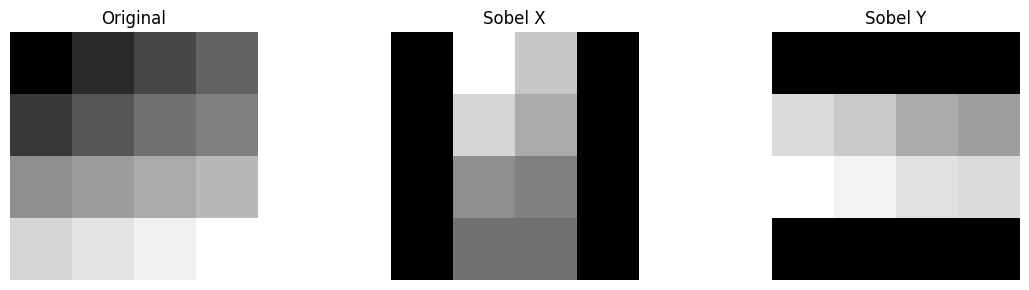

In [19]:
# ------------------------------------------------------
# Question 2 Task 1
# ------------------------------------------------------

import numpy as np
import cv2
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Sample grayscale image
# ------------------------------------------------------

image = np.array([
    [50, 80, 100, 120],
    [90, 110, 130, 140],
    [150, 160, 170, 180],
    [200, 210, 220, 230]
], dtype=np.uint8)

# ------------------------------------------------------
# Define custom Sobel X and Y filters
# ------------------------------------------------------

sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# ------------------------------------------------------
# Apply the custom filters using cv2.filter2D
# ------------------------------------------------------

sobel_x = cv2.filter2D(src=image, ddepth=cv2.CV_64F, kernel=sobel_x_kernel)
sobel_y = cv2.filter2D(src=image, ddepth=cv2.CV_64F, kernel=sobel_y_kernel)

# ------------------------------------------------------
# Display the results
# ------------------------------------------------------

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sobel X")
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [23]:
# ------------------------------------------------------
# Question 2 Task 2
# ------------------------------------------------------

import tensorflow as tf

# ------------------------------------------------------
# Create random 4x4 matrix
# ------------------------------------------------------

input_matrix = tf.constant(np.random.randint(0, 10, (1, 4, 4, 1)), dtype=tf.float32)

# ------------------------------------------------------
# Apply pooling
# max-pooled matrix
# ------------------------------------------------------

max_pool = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')

# ------------------------------------------------------
# average-pooled matrix
# ------------------------------------------------------

avg_pool = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')

print("Original Matrix:\n", tf.squeeze(input_matrix).numpy())
print("\nMax Pooled:\n", tf.squeeze(max_pool).numpy())
print("\nAverage Pooled:\n", tf.squeeze(avg_pool).numpy())


Original Matrix:
 [[5. 9. 9. 3.]
 [6. 2. 9. 5.]
 [8. 9. 8. 3.]
 [9. 5. 5. 3.]]

Max Pooled:
 [[9. 9.]
 [9. 8.]]

Average Pooled:
 [[5.5  6.5 ]
 [7.75 4.75]]


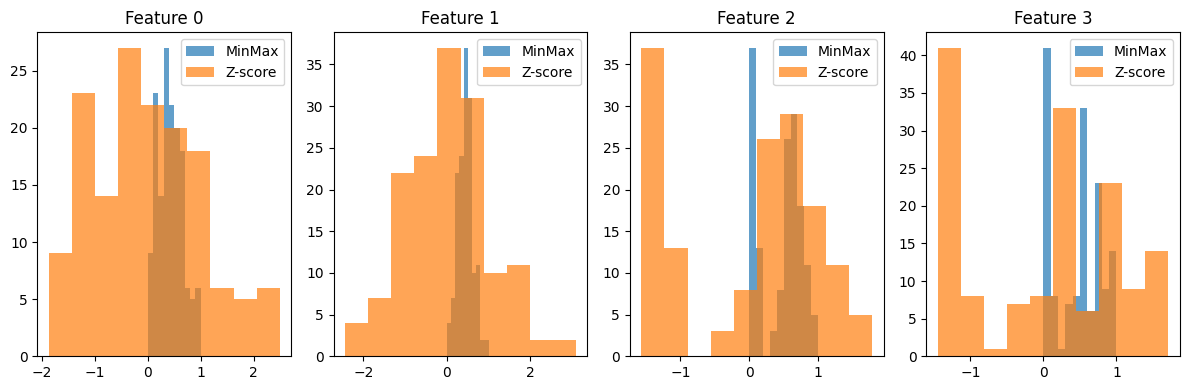

Raw Accuracy: 1.0
Min-Max Accuracy: 0.9736842105263158
Z-score Accuracy: 1.0


In [21]:
# ------------------------------------------------------
# Question 3
# ------------------------------------------------------

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Load Iris dataset
# ------------------------------------------------------

iris = load_iris()
X = iris.data
y = iris.target

# ------------------------------------------------------
# Min-Max Normalization
# ------------------------------------------------------

minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

# ------------------------------------------------------
# Z-score Standardization
# ------------------------------------------------------

zscore = StandardScaler()
X_zscore = zscore.fit_transform(X)

# ------------------------------------------------------
# Compare distributions
# ------------------------------------------------------

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.hist(X_minmax[:, i], bins=10, alpha=0.7, label='MinMax')
    plt.hist(X_zscore[:, i], bins=10, alpha=0.7, label='Z-score')
    plt.title(f'Feature {i}')
    plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# Logistic Regression - Raw
# ------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train, y_train)
print("Raw Accuracy:", model_raw.score(X_test, y_test))

# ------------------------------------------------------
# Logistic Regression - MinMax
# ------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, random_state=42)
model_norm = LogisticRegression(max_iter=200)
model_norm.fit(X_train, y_train)
print("Min-Max Accuracy:", model_norm.score(X_test, y_test))

# ------------------------------------------------------
# Logistic Regression - Z-score
# ------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, random_state=42)
model_std = LogisticRegression(max_iter=200)
model_std.fit(X_train, y_train)
print("Z-score Accuracy:", model_std.score(X_test, y_test))

# ------------------------------------------------------
#5.	Explain in which scenarios normalization vs. standardization is preferable for deep learning.
# ------------------------------------------------------

#Normalization scales data between 0 and 1 and is best for image data or when all features need to be on the same scale.
#Standardization centers data around 0 with unit variance, useful when data has outliers or different ranges.
#Use Normalization for neural networks like CNNs, and Standardization for models like Logistic Regression or SVMs.